# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
import io
from google.colab import files
upoaded = files.upload()

Saving ionosphere_data.csv to ionosphere_data.csv


In [3]:
df=pd.read_csv('ionosphere_data.csv')
df.head

<bound method NDFrame.head of      feature1  feature2  feature3  ...  feature33  feature34  label
0           1         0   0.99539  ...    0.18641   -0.45300      g
1           1         0   1.00000  ...   -0.13738   -0.02447      b
2           1         0   1.00000  ...    0.56045   -0.38238      g
3           1         0   1.00000  ...   -0.32382    1.00000      b
4           1         0   1.00000  ...   -0.04608   -0.65697      g
..        ...       ...       ...  ...        ...        ...    ...
346         1         0   0.83508  ...    0.90546   -0.04307      g
347         1         0   0.95113  ...    0.91483    0.04712      g
348         1         0   0.94701  ...    0.92697   -0.00577      g
349         1         0   0.90608  ...    0.87403   -0.16243      g
350         1         0   0.84710  ...    0.85764   -0.06151      g

[351 rows x 35 columns]>

In [8]:
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [9]:
y=df[['label']].values

In [10]:
index=np.where(y=='g')
y[index]=np.take(0,index[1])

In [11]:
index=np.where(y=='b')

In [12]:
y[index]=np.take(1,index[1])

In [15]:
x=(df.loc[:,df.columns!='label'].values)

In [16]:
x=x.astype('float32')

In [90]:
y=y.astype('float32')

In [91]:
np.any(np.isnan(x))

False

In [92]:
x -= np.amin(x, axis=(0, 1))
x /= np.amax(x, axis=(0, 1))

In [93]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(x, y, test_size=0.40, random_state=42,shuffle=True)

In [128]:
from keras import models
from keras import layers
from keras import regularizers
model=models.Sequential()
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu',input_shape=(train_data.shape[1],)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [129]:
history=model.fit(train_data,train_label,epochs=500,batch_size=32)
history_dic= history.history
history_dic.keys()

Epoch 1/500
7/7 [==============================] - 1s 2ms/step - loss: 0.7391 - accuracy: 0.6657
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 0.7182 - accuracy: 0.6547
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.6630
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.6466
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.6517
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6698
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.7009
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6745
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.6866
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.6703
Epoch 11/500
7/7 [===========

dict_keys(['loss', 'accuracy'])

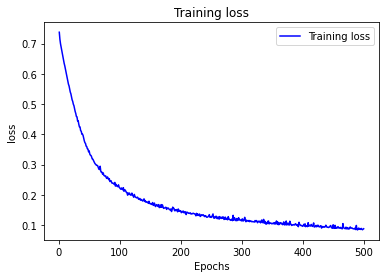

In [134]:
import matplotlib.pyplot as plt
loss_values=history_dic['loss']
acc=history_dic['accuracy']
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss_values,'b',label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [135]:
model.fit(train_data,train_label,epochs=500,batch_size=16)
results=model.evaluate(test_data,test_label)

Epoch 1/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9952
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9952
Epoch 3/500
14/14 [==============================] - 0s 1ms/step - loss: 0.1737 - accuracy: 0.9524
Epoch 4/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.9952
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9952
Epoch 6/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9952
Epoch 7/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9952
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9857
Epoch 9/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9952
Epoch 10/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.9952
Epoch 11/

In [136]:
results

[0.23779290914535522, 0.9503546357154846]

In [142]:
model.predict(test_data)

array([[0.002818],
       [0.002835],
       [0.000008],
       [0.148601],
       [0.004788],
       [0.002137],
       [0.014397],
       [0.000009],
       [0.000251],
       [0.000202],
       [1.000000],
       [1.000000],
       [0.999998],
       [0.920661],
       [0.002294],
       [0.009820],
       [0.000033],
       [0.999751],
       [0.012948],
       [1.000000],
       [0.001567],
       [1.000000],
       [1.000000],
       [0.033304],
       [0.000493],
       [0.994395],
       [0.999847],
       [1.000000],
       [1.000000],
       [0.001561],
       [0.063564],
       [0.001857],
       [0.001276],
       [0.002809],
       [0.000005],
       [1.000000],
       [0.001183],
       [0.025642],
       [0.787231],
       [0.000003],
       [0.000012],
       [0.002015],
       [0.014396],
       [0.999978],
       [0.000009],
       [0.999413],
       [0.999991],
       [0.009631],
       [0.978925],
       [0.000008],
       [0.000992],
       [0.994429],
       [1.00